In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('rossmann-store-sales/new_train.csv')
data.drop("Unnamed: 0", axis=1, inplace=True)


/home/edith/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## droped un named: 0 columns due to ridundency

In [14]:
print(data.shape)
data.describe()

(864627, 10)


,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,864627.000000,864627.000000,864627.000000,864627.000000,864627.000000,864627.000000,864627.000000,864627.000000
mean,432313.000000,558.412263,4.000823,5821.200421,636.006963,0.831202,0.378113,0.187432
std,249596.459936,321.952663,2.000008,3868.119515,465.223080,0.374573,0.484916,0.390258
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,216156.500000,280.000000,2.000000,3774.000000,410.000000,1.000000,0.000000,0.000000
50%,432313.000000,558.000000,4.000000,5787.000000,612.000000,1.000000,0.000000,0.000000
75%,648469.500000,838.000000,6.000000,7907.000000,839.000000,1.000000,1.000000,0.000000
max,864626.000000,1115.000000,7.000000,41551.000000,5494.000000,1.000000,1.000000,1.000000


In [16]:
data.any()

Unnamed: 0       True
Store            True
DayOfWeek        True
Date             True
Sales            True
Customers        True
Open             True
Promo            True
StateHoliday     True
SchoolHoliday    True
dtype: bool

In [3]:
store=pd.read_csv('rossmann-store-sales/store.csv')

In [19]:
data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
# data[:,[2,3,4,5,6]].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# plt.show()


1. clean all nulls
2. competition rank- distance included fro the appropriate time: feature engineering
3. create a standarized version of the data (depending on algorthm) 
4. change letters to int.
4. time series piping for train/test


In [24]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,864627.000000,864627.000000,864627.000000,864627.000000,864627.000000,864627.000000,864627.000000
mean,558.412263,4.000823,5821.200421,636.006963,0.831202,0.378113,0.187432
std,321.952663,2.000008,3868.119515,465.223080,0.374573,0.484916,0.390258
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3774.000000,410.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5787.000000,612.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7907.000000,839.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5494.000000,1.000000,1.000000,1.000000


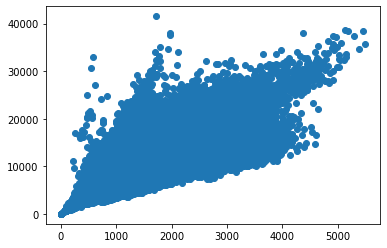

In [27]:
plt.scatter(data['Customers'], data['Sales'])

In [38]:
data['Date']=pd.to_datetime(data['Date'])

## change date to datetime type

In [40]:
data = data.set_index('Date')

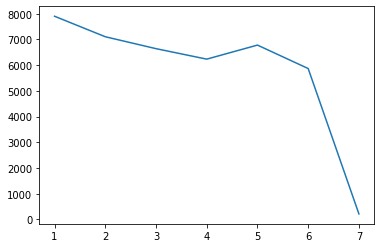

In [50]:
byday=data.groupby('DayOfWeek').mean()
plt.plot(byday.Sales)

In [51]:
indexes= [data.index.year,
         data.index.month,
         data.index.week,
         data.index.weekday,
         data.index.day]
aggregated = data.groupby([data.index.year,
         data.index.month,
         data.index.week,
         data.index.weekday,
         data.index.day]).sum()

In [52]:
aggregated.head()

Store  DayOfWeek    Sales  Customers  Open  Promo  \
Date Date Date Date Date                                                       
2013 5    20   4    17     14878        860  1237425     130839   171    172   
               5    18    622170       6690  6410461     739439  1112      0   
               6    19    622170       7805   226808      40462    31      0   
          21   0    20    622170       1115   253936      44288    33      0   
               1    21    622170       2230  7204456     865862  1111      0   

                          SchoolHoliday  
Date Date Date Date Date                 
2013 5    20   4    17                9  
               5    18                0  
               6    19                0  
          21   0    20               75  
               1    21              728

In [57]:
index_level_names = ['year','month','week','weekday','day']
for i,index_level in enumerate(index_level_names):
    aggregated.index.set_names(index_level,level=i,inplace=True)

In [58]:
aggregated.head()

Store  DayOfWeek    Sales  Customers  Open  \
year month week weekday day                                                
2013 5     20   4       17    14878        860  1237425     130839   171   
                5       18   622170       6690  6410461     739439  1112   
                6       19   622170       7805   226808      40462    31   
           21   0       20   622170       1115   253936      44288    33   
                1       21   622170       2230  7204456     865862  1111   

                             Promo  SchoolHoliday  
year month week weekday day                        
2013 5     20   4       17     172              9  
                5       18       0              0  
                6       19       0              0  
           21   0       20       0             75  
                1       21       0            728

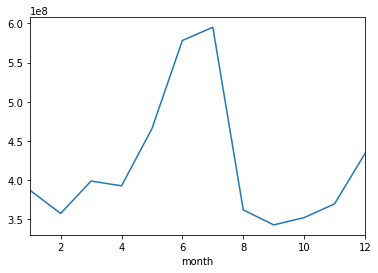

In [70]:
aggregated.Sales.groupby(level=1).sum().plot()

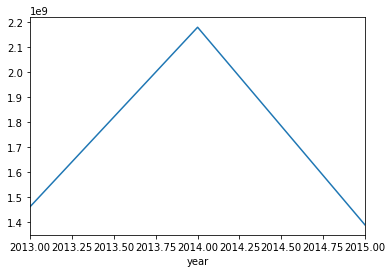

In [71]:
aggregated.Sales.groupby(level=0).sum().plot()

In [72]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [85]:
# save to csv file 
data.to_csv(r'cleaned_data.csv')

In [86]:
data2=pd.read_csv('cleaned_data.csv')

In [87]:
data2.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2015-07-31,1,5,5263,555,1,1,0,1
1,2015-07-31,2,5,6064,625,1,1,0,1
2,2015-07-31,3,5,8314,821,1,1,0,1
3,2015-07-31,4,5,13995,1498,1,1,0,1
4,2015-07-31,5,5,4822,559,1,1,0,1
